In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

firstdata = pd.read_stata("C:/UN Comtrade-1.dta")

#Q1 

#get basic statistics about UN data
print(firstdata) 
print(firstdata.describe())
print(firstdata.info())

        year  reportercode reporter reporteriso  commoditycode  \
0       2002            12  Algeria         DZA              1   
1       2002            12  Algeria         DZA              2   
2       2002            12  Algeria         DZA              3   
3       2002            12  Algeria         DZA              4   
4       2002            12  Algeria         DZA              5   
...      ...           ...      ...         ...            ...   
296104  2021           894   Zambia         ZMB             94   
296105  2021           894   Zambia         ZMB             95   
296106  2021           894   Zambia         ZMB             96   
296107  2021           894   Zambia         ZMB             97   
296108  2021           894   Zambia         ZMB             99   

                                                commodity      imports  \
0                                            Live animals    8721081.0   
1                              Meat and edible meat offal  

In [31]:
#  year range
years = firstdata['year'].unique()
#print("Year range is " + str(years[0]) + " - " + str(years[len(years) - 1]) + ".")

#  unique countries
countries = firstdata['reporter'].unique()
#print(countries)
#print(len(countries))

# unique commodities 
comms = firstdata['commodity'].unique()
#print(comms)
#print(len(comms))

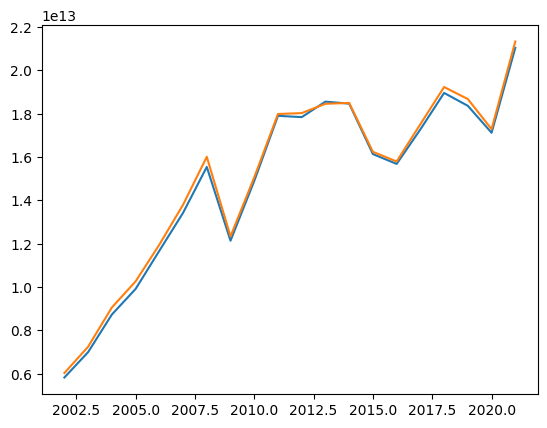

In [32]:
#  plotting import and export

agg_year = firstdata.groupby(['year']).agg({'exports': 'sum', 'imports' : 'sum'}).reset_index()
fig, ax = plt.subplots(1)
ax.plot(agg_year['year'], (agg_year['exports']), '-')
ax.plot(agg_year['year'], (agg_year['imports']), '-')

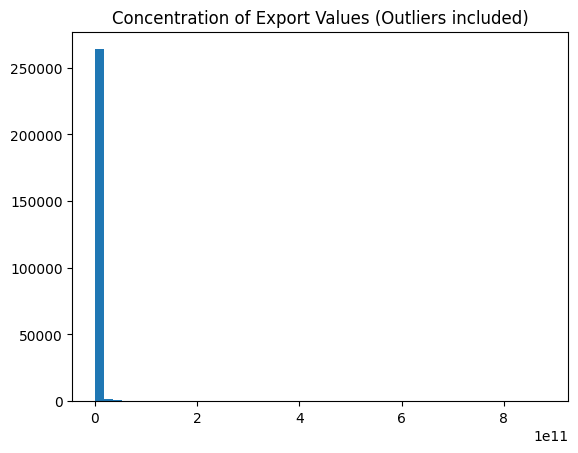

Text(0.5, 1.0, 'Concentration of Export Values (Outliers filtered out)')

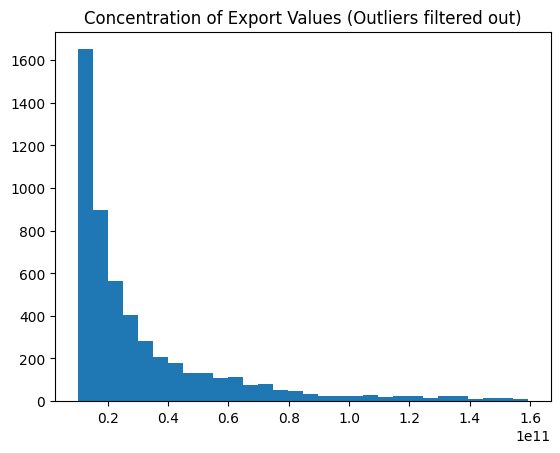

In [46]:
# histogram 
#just plotting the exports works, but outliers cause the histogram to look like one bar, 
#filtering out the high outliers will fix this, but it is ommitting some data

#plt.figure(1)
unfilteredhist = plt.hist(firstdata['exports'], bins=50)
plt.title("Concentration of Export Values (Outliers included)")
plt.show()


plt.figure(2)
lowerbound = 1e10
upperbound = 1.01 * 10**11.2
data_filtered = firstdata[(firstdata['exports'] >= lowerbound) & (firstdata['exports'] <= upperbound)]
filteredhist = plt.hist(data_filtered['exports'], bins=30)
plt.title("Concentration of Export Values (Outliers filtered out)")

In [34]:
#  the biggest exporter of machinery and mechanical appliances in 2008
onlyO8 = firstdata[(firstdata['year'] == 2008) & (firstdata['commoditycode'] == 84)]
biggestO8exporter = [onlyO8.loc[onlyO8['exports'].idxmax()]]
print(biggestO8exporter)

[year                                                          2008
reportercode                                                   156
reporter                                                     China
reporteriso                                                    CHN
commoditycode                                                   84
commodity        Machinery and mechanical appliances; parts the...
imports                                             140067766272.0
exports                                             285746397184.0
Name: 77917, dtype: object]


In [35]:
#  top 5 biggest exporters and importers 

#section off the data for imports only, sum all the imports up, grab the top 5
importonly = firstdata[['year', 'imports', 'reporter']]
importsum = importonly.groupby('reporter')['imports'].sum().reset_index()
topfiveimport = importsum.nlargest(5, 'imports')
print(topfiveimport)

exportonly = firstdata[['year', 'exports', 'reporter']]
exportsum = exportonly.groupby('reporter')['exports'].sum().reset_index()
topfivexport = exportsum.nlargest(5, 'exports')
print(topfivexport)

topfive_combined = pd.merge(topfiveimport, topfivexport, on='reporter', how='outer', suffixes=('_import', '_export'))
topfive_combined_nona = topfive_combined.dropna()
print(topfive_combined)

           reporter       imports
180             USA  4.225308e+13
37            China  2.875973e+13
71          Germany  2.099368e+13
90            Japan  1.307054e+13
184  United Kingdom  1.236095e+13
    reporter       exports
37     China  3.458820e+13
180      USA  2.618344e+13
71   Germany  2.558322e+13
90     Japan  1.337967e+13
66    France  1.008375e+13
         reporter       imports       exports
0           China  2.875973e+13  3.458820e+13
1          France           NaN  1.008375e+13
2         Germany  2.099368e+13  2.558322e+13
3           Japan  1.307054e+13  1.337967e+13
4             USA  4.225308e+13  2.618344e+13
5  United Kingdom  1.236095e+13           NaN


In [36]:
# another way to do top 5s

grouped = firstdata.groupby('reporter').agg({'imports':'sum', 'exports':'sum'}).reset_index()
top_exporters = grouped.sort_values(by='exports', ascending = False).head(5)
top_importers = grouped.sort_values(by='imports', ascending = False).head(5)
print(top_importers) #filtered by top importers
print(top_exporters) #filtered by top exporters

           reporter       imports       exports
180             USA  4.225308e+13  2.618344e+13
37            China  2.875973e+13  3.458820e+13
71          Germany  2.099368e+13  2.558322e+13
90            Japan  1.307054e+13  1.337967e+13
184  United Kingdom  1.236095e+13  8.724794e+12
    reporter       imports       exports
37     China  2.875973e+13  3.458820e+13
180      USA  4.225308e+13  2.618344e+13
71   Germany  2.099368e+13  2.558322e+13
90     Japan  1.307054e+13  1.337967e+13
66    France  1.160115e+13  1.008375e+13


        reporter       exports       imports
0    Afghanistan  6.977031e+09  7.838164e+10
1        Albania  3.045363e+10  8.036857e+10
2        Algeria  7.895500e+11  5.890990e+11
3        Andorra  1.915914e+09  2.509275e+10
4         Angola  6.296955e+11  2.604364e+11
..           ...           ...           ...
189    Venezuela  5.424991e+11  3.436902e+11
190     Viet Nam  2.176489e+12  2.217878e+12
191        Yemen  5.733876e+10  1.047834e+11
192       Zambia  1.243988e+11  1.176672e+11
193     Zimbabwe  6.445484e+10  9.293219e+10

[194 rows x 3 columns]


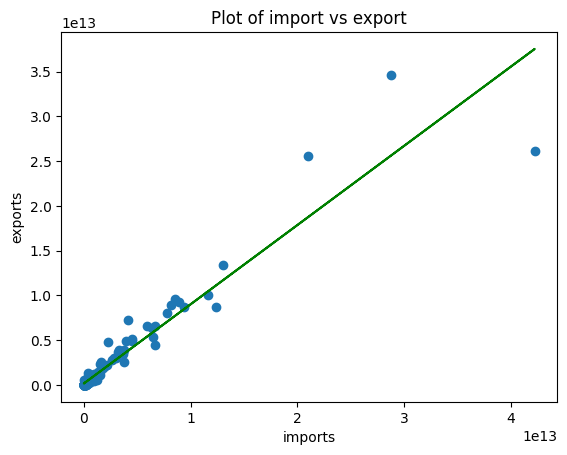

In [37]:
#  plotting the imports vs the exports
exp_and_imp = firstdata.groupby('reporter')[['exports','imports']].sum().reset_index()
print(exp_and_imp)
plt.scatter(exp_and_imp['imports'], exp_and_imp['exports'])
plt.xlabel('imports')
plt.ylabel('exports')
plt.title('Plot of import vs export')
slope, intercept = np.polyfit(exp_and_imp['imports'], exp_and_imp['exports'], 1)
plt.plot(exp_and_imp['imports'], slope * exp_and_imp['imports'] + intercept, color='green', label='Best fit line')

plt.show()

In [11]:

import statsmodels.formula.api as smf
import numpy as np

seconddata = pd.read_excel('C:/gravity_flow_no_zeros-1.xlsx')
print(seconddata)

# linear regression model of flow on gdp of importer and exporter country, minus the distance
#simulates the gravity trade model
logged_dist = np.log(seconddata['distw'])
seconddata['log_flow'] = np.log(seconddata['flow'])
seconddata['log_gdp_o'] = np.log(seconddata['gdp_o'])
seconddata['log_gdp_d'] = np.log(seconddata['gdp_d'])
seconddata['log_distw'] = np.log(seconddata['distw'])
formula = "log_flow ~ log_gdp_o + log_gdp_d - log_distw"
model = smf.ols(formula, data=seconddata).fit()
print(model.summary())

      iso_o iso_d         distw        gdp_o          gdp_d  rta        flow  \
0       AFG   ARG  15341.161651  8399.039062  214057.750000    0    0.061000   
1       AFG   AUS  11086.140572  8399.039062  768177.687500    0    0.405504   
2       AFG   AUT   4567.301990  8399.039062  322443.656250    0    0.164900   
3       AFG   AZE   1821.718680  8399.039062   20121.611328    0    0.001600   
4       AFG   BEL   5331.891731  8399.039062  392001.375000    0    4.158704   
...     ...   ...           ...          ...            ...  ...         ...   
17083   ZWE   VNM   9143.044150  5010.452637   60883.820312    0    0.086939   
17084   ZWE   YEM   4001.151262  5010.452637   19056.695312    0    0.316139   
17085   ZWE   ZAF   1258.552190  5010.452637  254991.562500    1  710.135000   
17086   ZWE   ZAR   1930.976364  5010.452637    8543.323242    0  182.605000   
17087   ZWE   ZMB    583.795373  5010.452637   10907.087891    1  175.101000   

       contig  comlang_off  comcur  
0 

In [39]:
#same linear regression model but adding distance, should not change the results, 
#as the model determines the signs, typically, the "+" sign is used in linear regression equations
forumla = "log_flow ~ log_gdp_o + log_gdp_d + log_distw"
model2 = smf.ols(formula, data=seconddata).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               log_flow   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     9980.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:43:41   Log-Likelihood:                -41822.
No. Observations:               17088   AIC:                         8.365e+04
Df Residuals:                   17085   BIC:                         8.367e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.6235      0.158   -130.396      0.0

In [40]:
#adding in more variables, R squared is slightly higher. These help the explanitory power of the 
#model, however there are still other factors to be concerned about/check for. However, 
#this is an improvement.

formula = "log_flow ~ log_gdp_o + log_gdp_d + log_distw + contig + rta + comcur"
model3 = smf.ols(formula, data=seconddata).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:               log_flow   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     4975.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:43:42   Log-Likelihood:                -39799.
No. Observations:               17088   AIC:                         7.961e+04
Df Residuals:                   17081   BIC:                         7.967e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.9369      0.277    -39.475      0.0

In [41]:
#checking for colinearity bewtween all the variables
correlation_matrix = seconddata[['log_gdp_o', 'log_gdp_d', 'log_distw', 'contig', 'rta', 'comcur']].corr()
print(correlation_matrix)

           log_gdp_o  log_gdp_d  log_distw    contig       rta    comcur
log_gdp_o   1.000000  -0.232336   0.068979 -0.008257  0.057441 -0.027155
log_gdp_d  -0.232336   1.000000   0.055100 -0.001149  0.073486 -0.020593
log_distw   0.068979   0.055100   1.000000 -0.388787 -0.551410 -0.248100
contig     -0.008257  -0.001149  -0.388787  1.000000  0.243156  0.153023
rta         0.057441   0.073486  -0.551410  0.243156  1.000000  0.223990
comcur     -0.027155  -0.020593  -0.248100  0.153023  0.223990  1.000000


In [7]:
#using ricardian data

thirddata = pd.read_excel("C:/ricardian.xlsx")
print(thirddata)


#relative productivity between the home and foreign country overall
thirddata['relative_productivity'] = thirddata['labor unit required_foreign'] / thirddata['labor unit required_home']
total_prod = sum(thirddata['relative_productivity']) ** (1/200)
print(total_prod)
# 1/alc / 1/a*lc = al*c / alc




     product code  labor unit required_home  labor unit required_foreign
0               1                 15.556072                    17.679422
1               2                 15.370814                    19.268547
2               3                  1.984626                    18.389589
3               4                  1.233614                    17.526406
4               5                  5.760505                    18.087255
..            ...                       ...                          ...
195           196                 11.282875                    19.708266
196           197                 18.841240                    13.603370
197           198                  9.262878                    19.041658
198           199                 16.984262                     7.989685
199           200                 17.833765                    10.256525

[200 rows x 3 columns]
1.0293952649129308


In [10]:
# determining if product will be produced in the foreign or home country based on relative productivity
#if relative productivity is above 2, then product will be produced in home country 
def home_produce(x):
    if x > 2:
        return 1
    else: 
        return 0
    
thirddata['home_produce']  = thirddata['relative_productivity'].apply(home_produce)
print(thirddata)


     product code  labor unit required_home  labor unit required_foreign  \
0               1                 15.556072                    17.679422   
1               2                 15.370814                    19.268547   
2               3                  1.984626                    18.389589   
3               4                  1.233614                    17.526406   
4               5                  5.760505                    18.087255   
..            ...                       ...                          ...   
195           196                 11.282875                    19.708266   
196           197                 18.841240                    13.603370   
197           198                  9.262878                    19.041658   
198           199                 16.984262                     7.989685   
199           200                 17.833765                    10.256525   

     relative_productivity  home_produce  
0                 1.136497             0  
1

In [12]:
# making linear regression model, using relative productivity to predict whether or not the 
#product would be produced at home or abroad
#from sklearn.model_selection import train_test_split

formula2 = "home_produce ~ relative_productivity"
train_data = thirddata.iloc[:150]
test_data = thirddata.iloc[150:] 
model4 = smf.ols(formula2, data=train_data).fit()
print(model4.summary())

thirddata['predictions'] = model4.predict(test_data)

#using first 150 data points to train, using other 50 for prediction, want to avoid overfitting the model

thirddata.loc[thirddata.index[-50:], 'predictions'] = np.where(thirddata['predictions'].iloc[-50:] > 0.5, 1, 0)
#thirddata['predictions'] = int(thirddata['predictions'])
print(thirddata.tail(60))



                            OLS Regression Results                            
Dep. Variable:           home_produce   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     159.3
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           2.97e-25
Time:                        16:47:50   Log-Likelihood:                -27.438
No. Observations:                 150   AIC:                             58.88
Df Residuals:                     148   BIC:                             64.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.02

In [16]:
#
import statistics
from sklearn.metrics import mean_squared_error

mean_squared_error(thirddata['home_produce'].loc[150:], thirddata['predictions'].loc[150:])
statistics.variance(thirddata['home_produce'])
#variance is 0.186
#mse is 0.22

#the mse is higher than the variance, which indicates there are still some improvements 
#to make to the model in order for it to better explain the variance found within the 
#data. However, it does capture a decent amount of variability. 
#aside from variance comparison, comparing to the MSE of other models could provide more insight 

0.18590452261306534